**1. Loading Libraries and Importing Dataset**

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("adult.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
df.shape

(48842, 15)

**2. Data Clearning**

NaN values are listed as "?" We will replace the NA values with most frequent value.

In [4]:
attrib, counts = np.unique(df['workclass'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
df['workclass'][df['workclass'] == '?'] = most_freq_attrib 

attrib, counts = np.unique(df['occupation'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
df['occupation'][df['occupation'] == '?'] = most_freq_attrib 

attrib, counts = np.unique(df['native-country'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
df['native-country'][df['native-country'] == '?'] = most_freq_attrib 

/var/folders/jh/c9ltgh315js0wz9qzgknw4tc0000gn/T/ipykernel_36577/3225647093.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['workclass'][df['workclass'] == '?'] = most_freq_attrib
/var/folders/jh/c9ltgh315js0wz9qzgknw4tc0000gn/T/ipykernel_36577/3225647093.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['occupation'][df['occupation'] == '?'] = most_freq_attrib
/var/folders/jh/c9ltgh315js0wz9qzgknw4tc0000gn/T/ipykernel_36577/3225647093.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [5]:
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,Private,227026,HS-grad,9,Never-married,Prof-specialty,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [6]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,0


**3. Exploratory Data Analysis**

Some of the questions we might ask:
- What is the relationship between age and income?

<AxesSubplot:xlabel='age', ylabel='Count'>

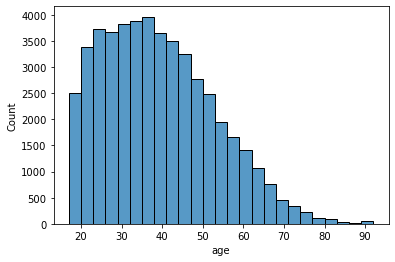

In [7]:
sns.histplot(data = df, x = 'age', binwidth = 3)

The histogram above shows that the "age" feature is not symmetric. It is righ skewed and most people with higher incomes are around 30-45 years old.

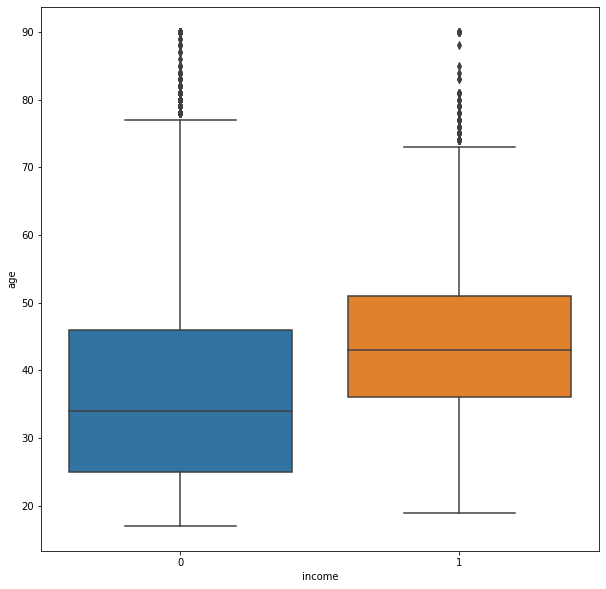

In [8]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="income", y="age", data=df)
plt.show()

In [9]:
df[['income', 'age']].groupby(['income'], as_index=False).mean().sort_values(by='age', ascending=False)

,income,age
1,1,44.275178
0,0,36.872184


Mean age for Income group (<= 50K) is 37 years old. And for income group that makes more than 50K is 44 years old.

One of the hypotheses we can test here is whether there is an association between age and income. The null hypothesis will state that there is no association. The alternative will state that there is a difference depending on age for income groups. 

- Is there a relationship between hours of week and income?

<AxesSubplot:xlabel='hours-per-week', ylabel='Count'>

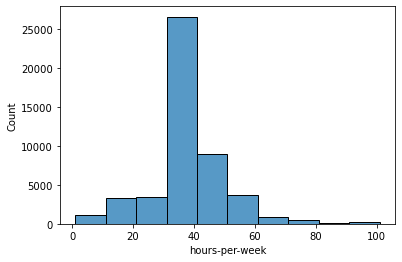

In [10]:
sns.histplot(data = df, x = 'hours-per-week', binwidth = 10)

Most people work between 30-40 hours a week. The majority of people (around 75%) work less than 45 hours a week.

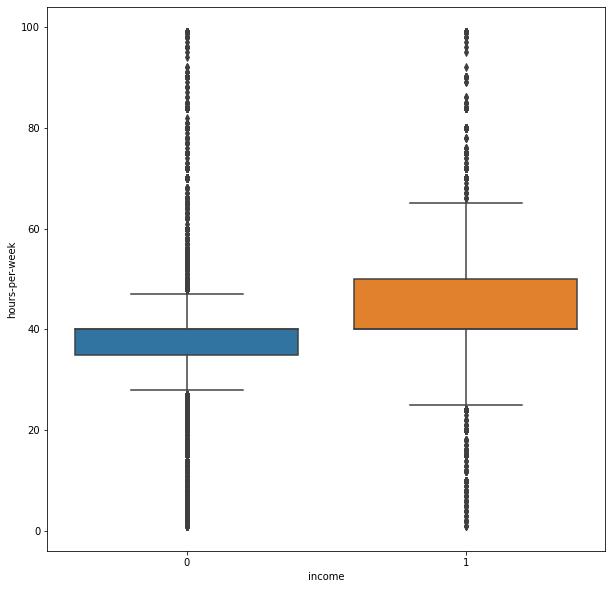

In [11]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="income", y="hours-per-week", data=df)
plt.show()

The median "hours-per-week" for Income group that earns more than 50k is greater than the Income group that earns less than 50k. We can test again the hypothesis that there is no association between hours per week and income. 

- What does the distribution of work class look like?

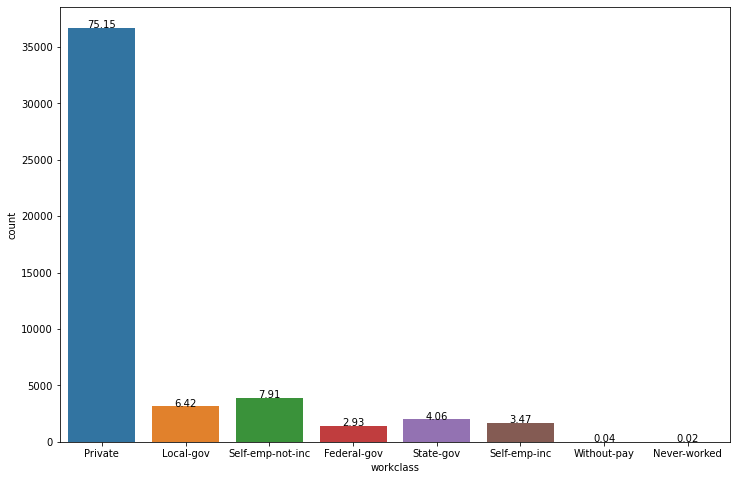

In [12]:
plt.figure(figsize=(12,8))

total = float(len(df["income"]) )

ax = sns.countplot(x="workclass", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

Most of the workers belong in the Private category (75%). There is a big imbalance when it comes to work class category.

posx and posy should be finite values
posx and posy should be finite values


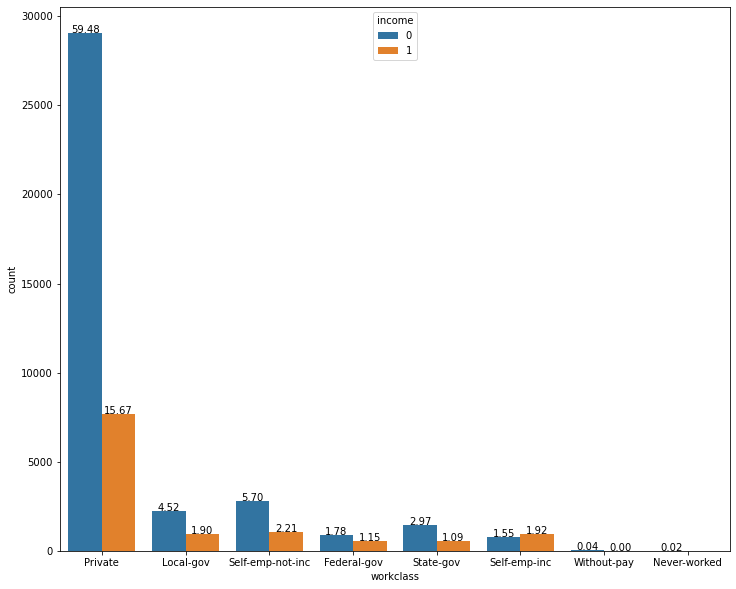

In [13]:
plt.figure(figsize=(12,10))
total = float(len(df["income"]) )

ax = sns.countplot(x="workclass", hue="income", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

This plot shows that:

- In private category most of the people(59.48%) earn <=50k(belong to income group 0).
- In Self-emp-inc workclass more people earn >50k (belong to income group 1).
- In Federal-gov workclass nearly more than half of the people earn >50k.

- What can we say about the education level and the relationship with income?

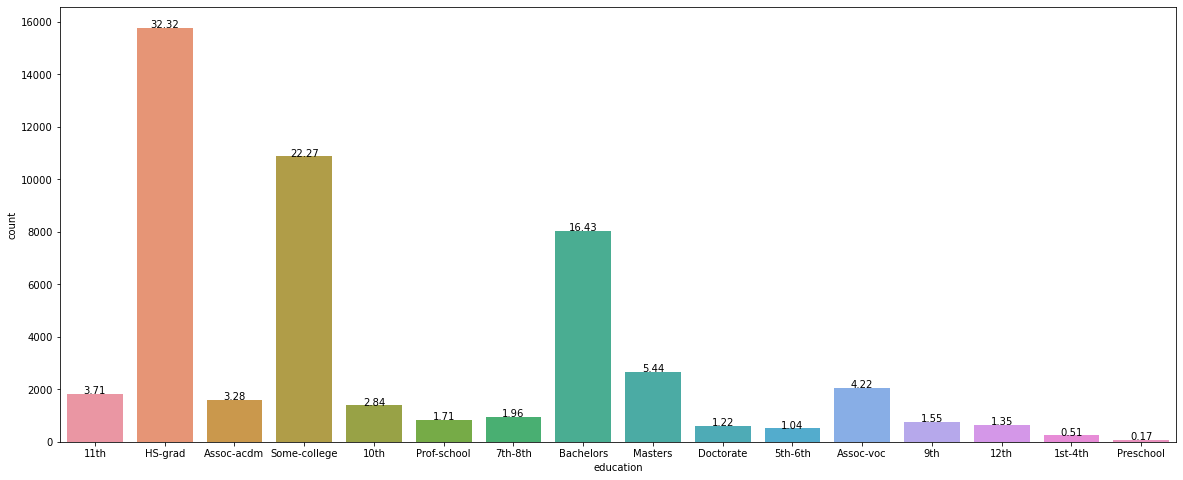

In [14]:
plt.figure(figsize=(20,8))
total = float(len(df["income"]) )

ax = sns.countplot(x="education", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

High school graduates have the highest number of people (32%), followed by Bacehlors degrees (16%) and Associate level (4%). 

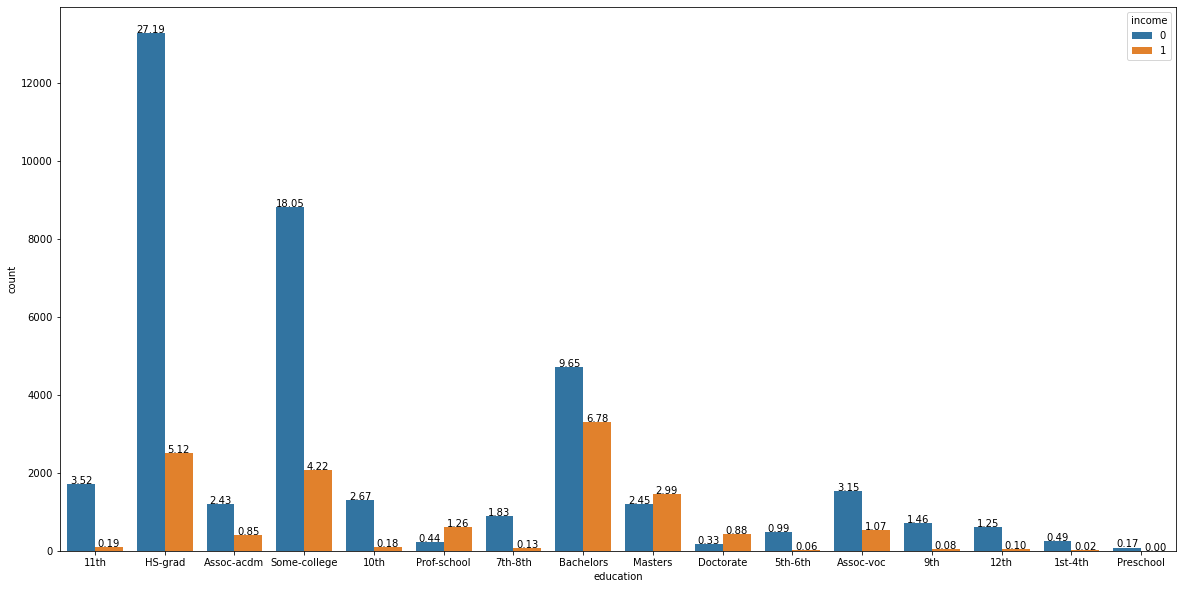

In [15]:
plt.figure(figsize=(20,10))
total = float(len(df["income"]) )

ax = sns.countplot(x="education", hue="income", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

This plot shows that:

In HS-grad category, only 5.12% of all people belong to the income group 1 (more than 50k) and 6.7% of bachelor graduates belong to income group 1. 
We can also infer that higher education may provide better earnings.

What does the relationship look like between race and income? Gender and income?

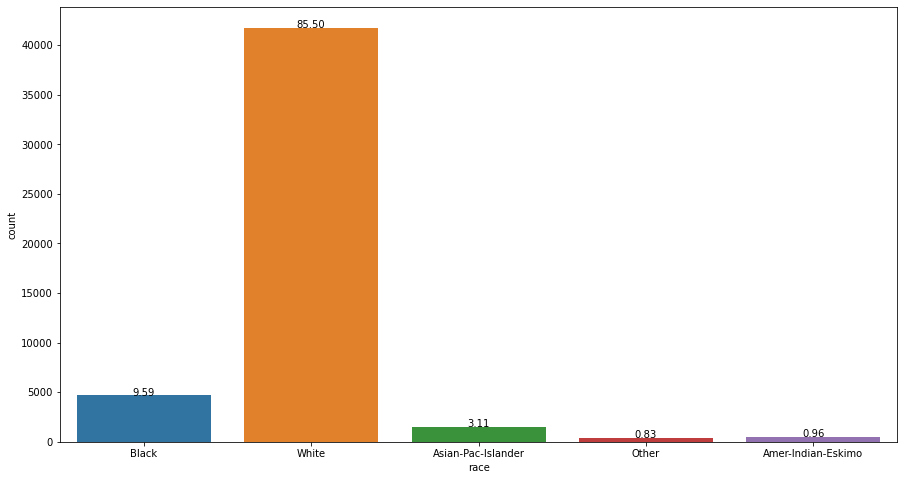

In [16]:
plt.figure(figsize=(15,8))
total = float(len(df) )

ax = sns.countplot(x="race", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

The majority (85.5%) of workers are "white", followed by "black".

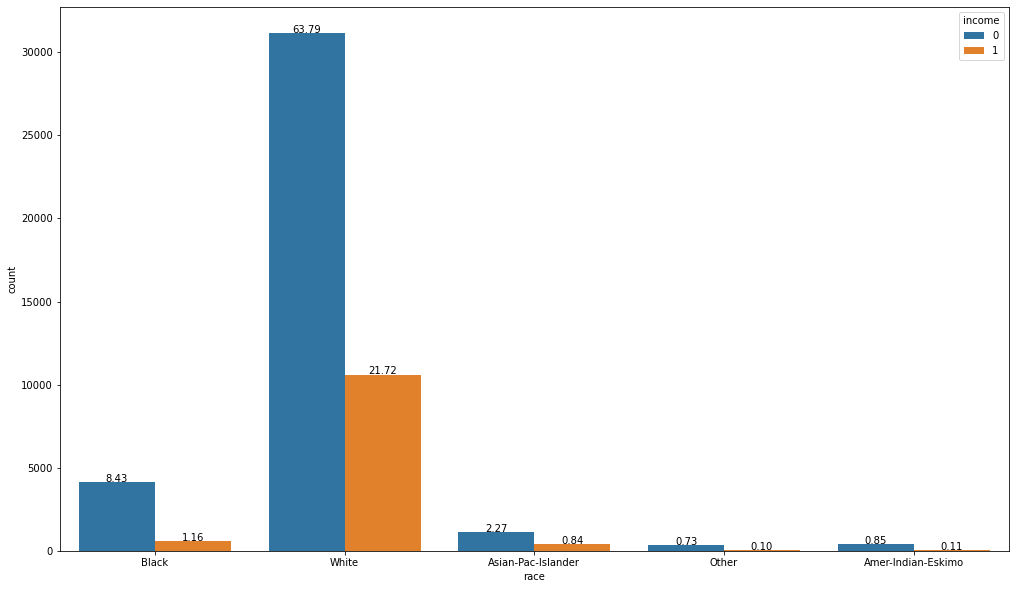

In [17]:
plt.figure(figsize=(17,10))
total = float(len(df) )

ax = sns.countplot(x="race", hue="income", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

21.7 % of white workers belong to income 1 group compared to only 1.16% for black race category.

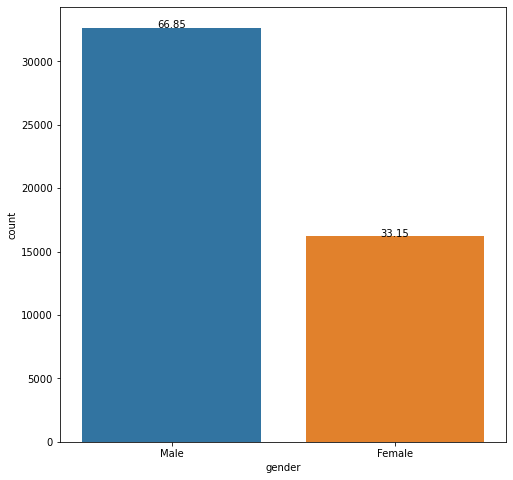

In [18]:
plt.figure(figsize=(8,8))
total = float(len(df) )

ax = sns.countplot(x="gender", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

The majority of workers are male (67%).

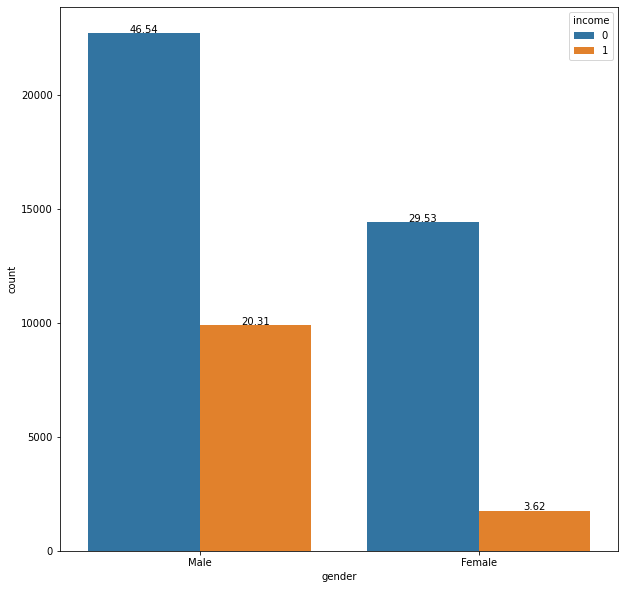

In [19]:
plt.figure(figsize=(10,10))
total = float(len(df) )

ax = sns.countplot(x="gender", hue="income", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

"Female" workers earning more than 50k account for only 3.62% of all observations.
But for "male" gender, 20.31% of all male workers earn more than 50k .

Now let's look at a correlation map.

/var/folders/jh/c9ltgh315js0wz9qzgknw4tc0000gn/T/ipykernel_36577/4016488052.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,linewidths=.5, cmap="Blues")


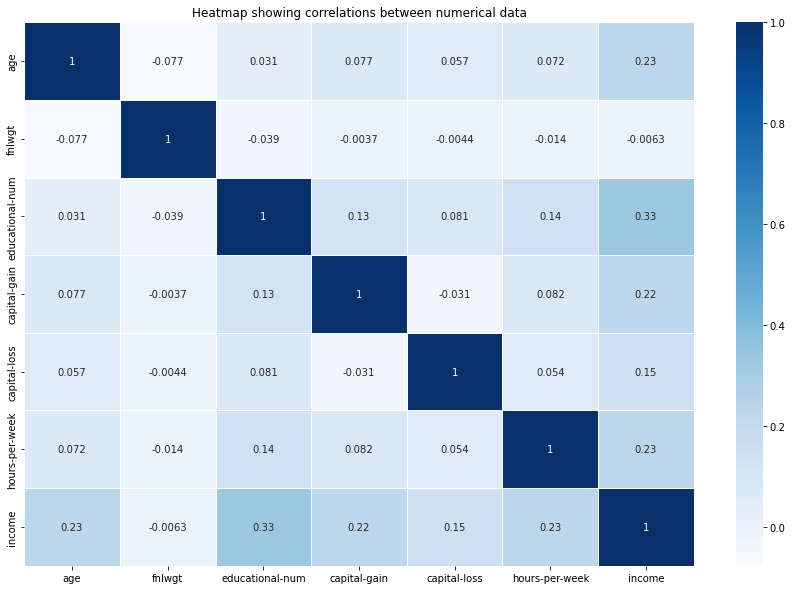

In [20]:
plt.figure(figsize=(15,10))  
sns.heatmap(df.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

There is no strong correlation between the numeric attributes.
The strongest correlation is present between 'educational-num' and 'income' (0.33). 

Let's look at a relationship between several categories. Is there a difference between gender, work hours and income?

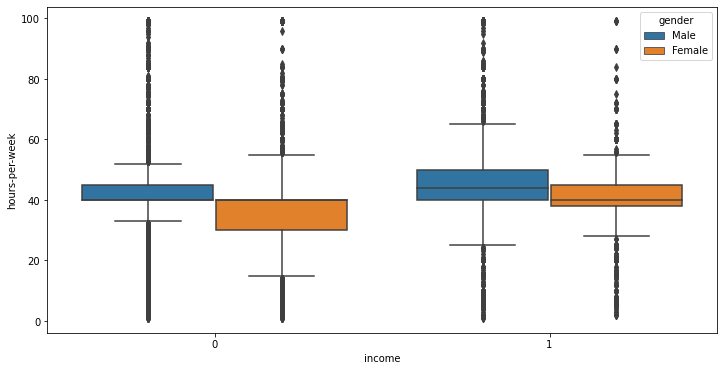

In [21]:
plt.figure(figsize=(12,6))
sns.boxplot(x='income',y ='hours-per-week', hue='gender',data=df)
plt.show()

It looks like females have more flexible working hours per week in the income group that earns <=50k.  Males have more flexible working hours per week in the income group that earns <=50k.

Now let's look at the relationship between age, gender and income.

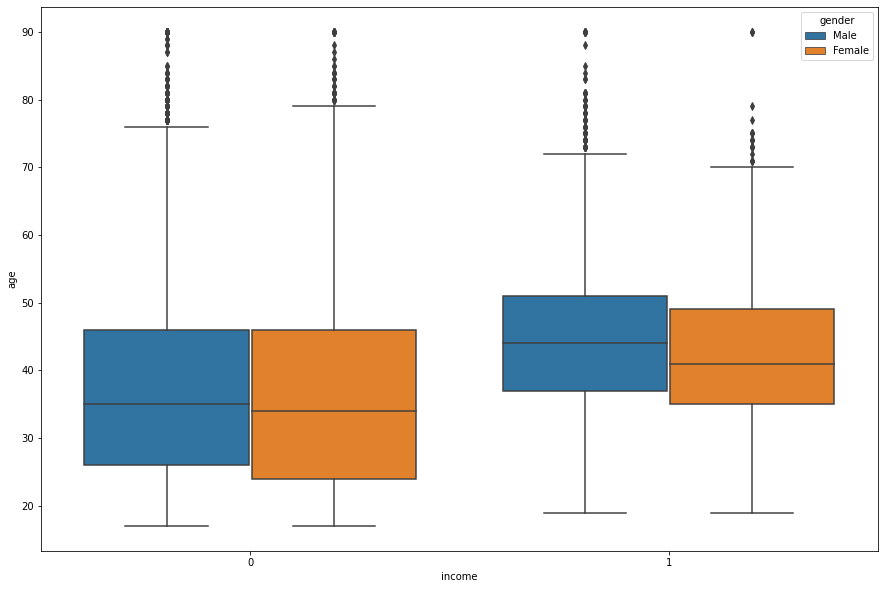

In [22]:
plt.figure(figsize=(15,10))
sns.boxplot(x="income", y="age",hue="gender",data=df)
plt.show()

Median age of females who earn less than 50k has minor difference compared to the Median age of males who earn less than 50k.
However, the median age of females that earn greater than 50k has age difference of 2-3years compared to the median age of males that earn greater than 50k.

**Conclusions:**
    
- Females have more flexible working hours per week in the income group that earns <=50k.

- Males have more flexible working hours per week in the income groups who earns >50k.

- The median age of females that earn greater than 50k has age difference of 2-3 years compared to the median age of males that earn greater than 50k.

- Generally people can be seen working for 30 hours to 40 hours per week. 

- Income groups that earns >50k have flexible working hours.